This code block only contains functions. I put separate forward, backprop, and model_test functions for each different activation function that was used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

def identity(z):
    return np.dot(1, z)

def d_identity(z):
    z = 1
    return z

def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def d_tanh(z):
	return 1 - np.power(tanh(z), 2)

def mean_square_error(y_predicted, y_actual):
    return np.square(np.subtract(y_actual, y_predicted)).mean()

def initialize_parameters(num_neurons = 2):
    np.random.seed(1)
    w1 = np.random.rand(2, num_neurons)
    w2 = np.random.rand(num_neurons, 1)
    b1 = np.random.rand(1, 1)
    b2 = np.random.rand(1, 1)
    return w1, w2, b1, b2

def forward_pass_sigmoid():
    #  original product of input layer and activation output
    z1 = np.dot(X_train, w1) + b1
    a1 = sigmoid(z1)

    # original product of hidden layer and activation output
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2

def forward_pass_tanh():
    #  original product of input layer and activation output
    z1 = np.dot(X_train, w1) + b1
    a1 = tanh(z1)

    # original product of hidden layer and activation output
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2

def forward_pass_identity():
    #  original product of input layer and activation output
    z1 = np.dot(X_train, w1) + b1
    a1 = identity(z1)

    # original product of hidden layer and activation output
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2
    

def backprop_sigmoid(w1, w2, b1, b2, learning_rate = .00001):
    
    # partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_sigmoid(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_sigmoid(a2), w2.T) * d_sigmoid(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_sigmoid(a2), w2.T) * d_sigmoid(a1)
    
    # updating weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

def backprop_tanh(w1, w2, b1, b2, learning_rate = .00001):
    
    # partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_tanh(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_tanh(a2), w2.T) * d_tanh(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_tanh(a2), w2.T) * d_tanh(a1)
    
    # updating weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

def backprop_identity(w1, w2, b1, b2, learning_rate = .00001):
    
    # partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_identity(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_identity(a2), w2.T) * d_identity(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_identity(a2), w2.T) * d_identity(a1)
    
    # updating weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

def test_model_sigmoid():
    # original product of input layer and activation output
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = sigmoid(test_z1)

    # original product of hidden layer and activation output
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Sigmoid Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)    

def test_model_tanh():
    # original product of input layer and activation output
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = tanh(test_z1)

    # original product of hidden layer and activation output
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Tanh Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)

def test_model_identity():
    # original product of input layer and activation output
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = identity(test_z1)

    # original product of hidden layer and activation output
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Identity Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)

The following block is the requested SIGMOID implementation as specified in the assignment. This block also contains all the necessary graphs for this assignment.

Iteration 0: Cost: 5278.378230455073
Iteration 2000: Cost: 30.975431910669418
Iteration 4000: Cost: 11.005686857847268
Iteration 6000: Cost: 3.8729850087338127
Iteration 8000: Cost: 1.378439540468384
Iteration 10000: Cost: 0.49774213449195526
Iteration 12000: Cost: 0.17991983318726562
Iteration 13155: Final Sigmoid Training Cost: 0.09997786555508982
Test Model Cost with Sigmoid Activation: 79.3289980383811


Text(0.5, 1.0, 'Cost vs Number of Neurons')

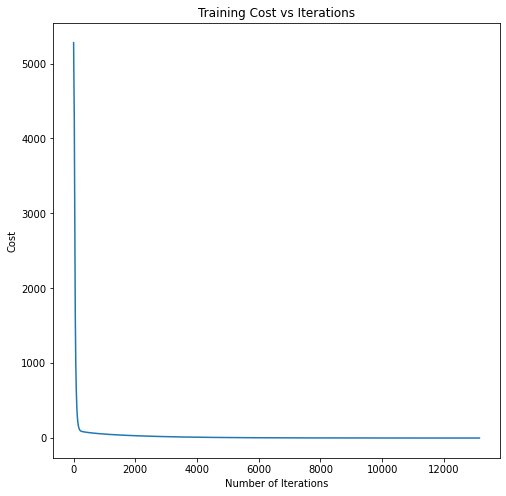

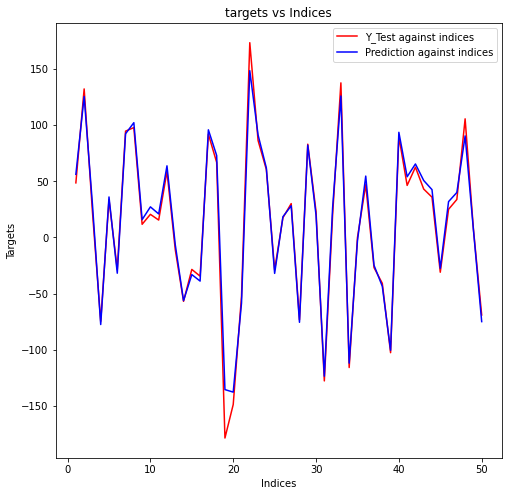

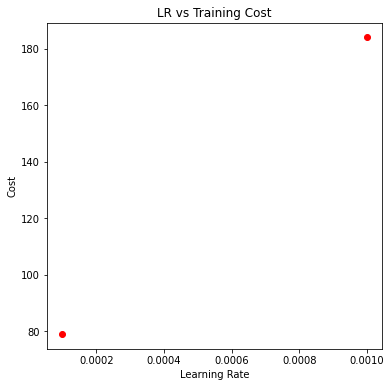

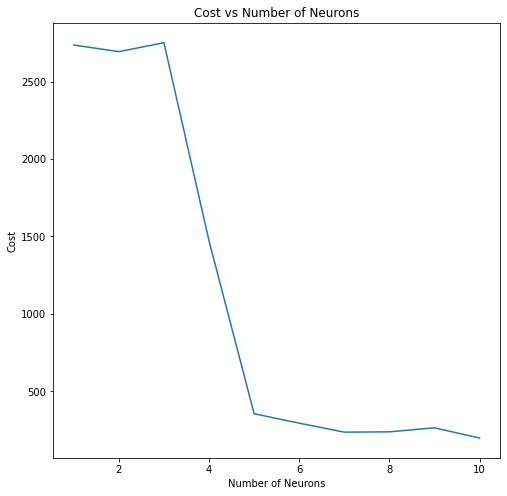

In [2]:
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")
Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

w1, w2, b1, b2 = initialize_parameters(50)

loss_array = np.empty((0, 0))
    
for i in range(500000):
    
    z1, z2, a1, a2 = forward_pass_sigmoid()
    w1, w2, b1, b2, db2, db1 = backprop_sigmoid(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    if (i % 2000 == 0):
            print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}: Final Sigmoid Training Cost: {}".format(i, loss))
        break
    i = i + 1
    
loss_iterations = np.linspace(1, len(loss_array), len(loss_array))
plt.figure(1, figsize=(8, 8))
plt.plot(loss_iterations, loss_array)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Training Cost vs Iterations")

test_loss, test_prediction = test_model_sigmoid()
prediction_iterations = np.linspace(1, len(Y_test), len(Y_test))
plt.figure(2, figsize=(8, 8))
y_test_line, = plt.plot(prediction_iterations, Y_test, color='red')
prediction_line, = plt.plot(prediction_iterations, test_prediction, color="blue")
plt.xlabel("Indices")
plt.ylabel("Targets")
plt.title("targets vs Indices")
plt.legend([y_test_line, prediction_line], ['Y_Test against indices', 'Prediction against indices'])

learning_rate_array = [.0001, .001]
cost_lr_array = [79, 184]
cost_lr_array = np.reshape(cost_lr_array, (2,1))
learning_rate_array = np.reshape(learning_rate_array, (2,1))
plt.figure(3, figsize=(6, 6))
y_test_line = plt.scatter(learning_rate_array, cost_lr_array, color='red')
plt.xlabel("Learning Rate")
plt.ylabel("Cost")
plt.title("LR vs Training Cost")

neuron_cost_array = [2737, 2694, 2752, 1472, 355, 294, 236, 238, 264, 198]
num_neurons_array = np.linspace(1, 10, 10)
neuron_cost_array = np.reshape(neuron_cost_array, (10,1))
num_neurons_array = np.reshape(num_neurons_array, (10,1))
plt.figure(4, figsize=(8, 8))
y_test_line = plt.plot(num_neurons_array, neuron_cost_array)
plt.xlabel("Number of Neurons")
plt.ylabel("Cost")
plt.title("Cost vs Number of Neurons")

The following block is the secondary TANH activation function implementation as specified by Q2.5 in the assignment.

In [3]:
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")
Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

w1, w2, b1, b2 = initialize_parameters(10)

loss_array = np.empty((0, 0))
    
for i in range(500000):
    
    z1, z2, a1, a2 = forward_pass_tanh()
    w1, w2, b1, b2, db2, db1 = backprop_tanh(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    # if (i % 2000 == 0):
    #         print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}: Final Tanh Training Cost: {}".format(i, loss))
        break
    i = i + 1
    
test_loss, test_prediction = test_model_tanh()

Iteration 17934: Final Tanh Training Cost: 0.09995853603859092
Test Model Cost with Tanh Activation: 197.83525270948624


The following block is the additional IDENTITY activation function implementation as specified by Q2.5 in the assignment.

In [4]:
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")
Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

w1, w2, b1, b2 = initialize_parameters(10)

loss_array = np.empty((0, 0))
    
for i in range(500000):
    
    z1, z2, a1, a2 = forward_pass_identity()
    w1, w2, b1, b2, db2, db1 = backprop_identity(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    # if (i % 2000 == 0):
    #         print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}: Final ReLU Training Cost: {}".format(i, loss))
        break
    i = i + 1
    
test_loss, test_prediction = test_model_identity()

Iteration 1247: Final ReLU Training Cost: 0.0855309221335227
Test Model Cost with Identity Activation: 50.56719485428985
